From: CPC **188** 94-102 (2015)
A mixed basis density functional approach for low dimensional systems with B-splines

A B-spline of order $\kappa$ is formed by positive polynomials of degree $\kappa-1$ over $\kappa$ adjacent subintervals. These polynomials vanish everywhere outside the subinterval $\tau_{i} \le z \le \tau_{i+\kappa}$.

Given the order $\kappa$ and knot sequence $\{\tau_{i}\}$, B-spline can be generated by the following relation:

$$
B_{i,\kappa}(z) = \frac{z-\tau_{i}}{\tau_{i+\kappa-1} - \tau_{i}} B_{i,\kappa-1}(z) +
\frac{\tau_{i+\kappa} - z}{\tau_{i+\kappa} - \tau_{i+1}} B_{i+1,\kappa-1}(z)
$$

with

$$
B_{i,1}(z) = \begin{cases}
1, \,\,\tau_{i} \leq z \leq \tau_{i+1} \\
0, \,\,\text{otherwise}
\end{cases}
$$

For example $\kappa = 4$, we need at least xx subintervals.

In [88]:
κ = 5
Npoints = 11

11

In [126]:
z_min = 0.0
z_max = 10.0
τ = PeriodicGrid( collect(range(z_min,z_max,length=Npoints)) );

In [127]:
function eval_B_spline(τ::PeriodicGrid, i::Int64, κ::Int64, z::Float64)
    if κ == 1
        if (z < τ[i+1]) && (z >= τ[i])
            return 1.0
        else
            return 0.0
        end
    else
        term1 = (z - τ[i])/(τ[i+κ-1] - τ[i])*eval_B_spline(τ,i,κ-1,z)
        term2 = (τ[i+κ] - z)/(τ[i+κ] - τ[i+1])*eval_B_spline(τ,i+1,κ-1,z)
        return term1 + term2
    end
end

eval_B_spline (generic function with 4 methods)

In [128]:
eval_B_spline(τ,6,κ,0.9)

0.0

In [129]:
NptsPlot = 100
z_grid = range(z_min,z_max,length=NptsPlot)
B = zeros(NptsPlot,Npoints)
for i = 1:Npoints
    for i_z = 1:NptsPlot
        B[i_z,i] = eval_B_spline(τ,i,κ,z_grid[i_z])
    end
end

In [46]:
import PyPlot
const plt = PyPlot
plt.svg(true);

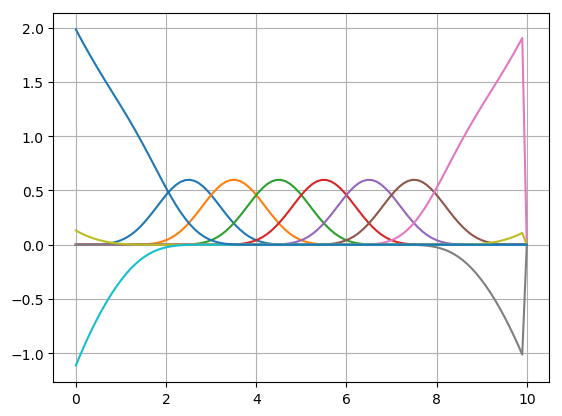

In [130]:
plt.clf()
for i = 1:Npoints
    plt.plot(z_grid, B[:,i])
end
plt.grid()

In [125]:
struct PeriodicGrid <: AbstractArray{Float64,1}
    grid::Array{Float64,1}
end

Base.size( S::PeriodicGrid ) = (length(S.grid),)
Base.IndexStyle(::Type{<:PeriodicGrid}) = IndexLinear()

import Base: getindex
function getindex( S::PeriodicGrid, i::Int )
    N = length(S.grid)
    ii = i%N
    if ii == 0
        return S.grid[N]
    else
        return S.grid[ii]
    end
end

getindex (generic function with 234 methods)

In [111]:
struct IsolatedGrid <: AbstractArray{Float64,1}
    grid::Array{Float64,1}
end

Base.size( S::IsolatedGrid ) = (length(S.grid),)
Base.IndexStyle(::Type{<:IsolatedGrid}) = IndexLinear()

import Base: getindex
function getindex( S::IsolatedGrid, i::Int )
    N = length(S.grid)
    if i > N
        return 0.0
    else
        return S.grid[i]
    end
end

getindex (generic function with 233 methods)

In [112]:
s = IsolatedGrid(collect(range(1.0,2.0,length=5)))

5-element IsolatedGrid:
 1.0 
 1.25
 1.5 
 1.75
 2.0 

In [114]:
s[8]

0.0